In [2]:
using FFTW

function stft(x, win::Vector, noverlap::Int, fftsize::Int)
    # x: input signal
    # win: window function
    # noverlap: number of overlapping signals 
    # fftsize: FFT size (in samples)
    
    hop = length(win) - noverlap; # hop size (in samples)
    # Calculate the number of frames in the STFT
    n_frames = 1 + (length(x) - fftsize) ÷ hop
    # println("n_frames = $n_frames")
    
    # Pre-allocate the STFT matrix
    X = zeros(ComplexF64, fftsize ÷ 2 + 1, n_frames)
    
    # Apply the window function to the input signal
    # x_win = x .* win
    
    # Compute the STFT frame by frame
    for i in 1:n_frames
        # Get the current frame
        start_idx = (i - 1) * hop + 1
        end_idx = start_idx + fftsize - 1
        x_frame = x[start_idx:end_idx] .* win
        # println("x_frame @ $i: $(size(x_frame))")

        if length(x_frame) < fftsize
            # println("Prev x_frame length : $(length(x_frame))")
            x_frame = append!(x_frame, zeros(fftsize - length(x_frame)))
            # println("Modified for FFT: $(length(x_frames))")
        end
        
        # Compute the FFT of the current frame
        X_frame = fft(x_frame)
        # println("X_frame -> $(size(X_frame))")
        
        # Store the first-half of the spectrum of the current frame in the STFT matrix
        X[:, i] = X_frame[1:fftsize ÷ 2 + 1]
    end
    
    return X
end

stft (generic function with 2 methods)

In [1]:
function stft(x, win::Vector, noverlap::Int, fftsize::Int, sample_rate::AbstractFloat)
    hop = length(win) - noverlap;
    X = stft(x, win, noverlap, fftsize);
    n_frames = 1 + (length(x) - fftsize) ÷ hop

    # Calculate the time and frequency vectors
    frame_rate = sample_rate / hop
    frame_duration = hop / sample_rate
    time = frame_duration * (0:n_frames-1)
    frequency = LinRange(0, sample_rate/2, fftsize ÷ 2 + 1)
    
    return X, time, frequency
end

stft (generic function with 1 method)

In [48]:
# Using Overlap-Add Method
function istft(X, win, noverlap)
    # X: STFT matrix
    # win: window function
    # noverlap: Number of Overlapping Samples during stride
    
    hop = length(win) - noverlap; # hop: hop size (in samples)
    
    # Get the number of FFT points and frames from the STFT matrix shape
    fftsize, n_frames = size(X)
    fftsize = (fftsize - 1) * 2; # Since only looking at postive frequencies during STFT
    
    # Pre-allocate the output signal
    n_samples = (n_frames - 1) * hop + fftsize
    x_recon = zeros(n_samples)
    
    # Apply the window function to the FFT frames and compute the iFFT
    for i in 1:n_frames
        # Compute the iFFT of the current frame
        x_frame = real(ifft([X[:, i]; conj(reverse(X[2:end-1, i]))]))
        # println(size(x_frame))
        
        # Apply the window function to the time-domain frame
        start_idx = (i - 1) * hop + 1
        end_idx = start_idx + fftsize - 1
        # println(fftsize)
        # println("$start_idx $end_idx $(end_idx-start_idx)")
        x_recon[start_idx:end_idx] += x_frame .* win
    end
    
    return x_recon
end

istft (generic function with 1 method)

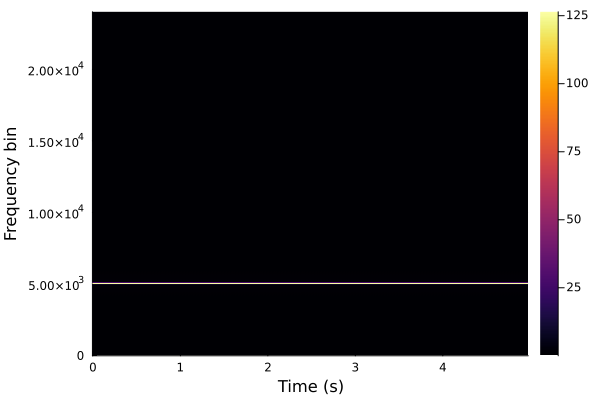

In [53]:
using Plots
using DSP: hamming

# Generate a test signal (sinusoidal tone plus noise)
fs = 48000  # Sample rate (Hz)
t = 0:1/fs:5
x = 0.5 * sin.(2π * 5000 .* t) #+ randn(length(t))

# Define the STFT parameters
win = hamming(1024)
hop = 512
fftsize = 1024

# Compute the STFT of the input signal
X = stft(x, win, hop, fftsize)
X, time, frequencies = stft(x, win, hop, fftsize, fs)

# Plot the magnitude spectrogram of the STFT
using Plots
heatmap(time, frequencies, abs.(X), xlabel="Time (s)", ylabel="Frequency bin")

In [57]:
# Modify the magnitude spectrum of the STFT
X_mod = X #.^ 0.5

# Reconstruct the modified signal using the iSTFT
x_mod = istft(X_mod, win, hop)



(1024,)
1024
1 1024 1023
(1024,)
1024
513 1536 1023
(1024,)
1024
1025 2048 1023
(1024,)
1024
1537 2560 1023
(1024,)
1024
2049 3072 1023
(1024,)
1024
2561 3584 1023
(1024,)
1024
3073 4096 1023
(1024,)
1024
3585 4608 1023
(1024,)
1024
4097 5120 1023
(1024,)
1024
4609 5632 1023
(1024,)
1024
5121 6144 1023
(1024,)
1024
5633 6656 1023
(1024,)
1024
6145 7168 1023
(1024,)
1024
6657 7680 1023
(1024,)
1024
7169 8192 1023
(1024,)
1024
7681 8704 1023
(1024,)
1024
8193 9216 1023
(1024,)
1024
8705 9728 1023
(1024,)
1024
9217 10240 1023
(1024,)
1024
9729 10752 1023
(1024,)
1024
10241 11264 1023
(1024,)
1024
10753 11776 1023
(1024,)
1024
11265 12288 1023
(1024,)
1024
11777 12800 1023
(1024,)
1024
12289 13312 1023
(1024,)
1024
12801 13824 1023
(1024,)
1024
13313 14336 1023
(1024,)
1024
13825 14848 1023
(1024,)
1024
14337 15360 1023
(1024,)
1024
14849 15872 1023
(1024,)
1024
15361 16384 1023
(1024,)
1024
15873 16896 1023
(1024,)
1024
16385 17408 1023
(1024,)
1024
16897 17920 1023
(1024,)
1024
17409 184

1024,)
1024
138753 139776 1023
(1024,)
1024
139265 140288 1023
(1024,)
1024
139777 140800 1023
(1024,)
1024
140289 141312 1023
(1024,)
1024
140801 141824 1023
(1024,)
1024
141313 142336 1023
(1024,)
1024
141825 142848 1023
(1024,)
1024
142337 143360 1023
(1024,)
1024
142849 143872 1023
(1024,)
1024
143361 144384 1023
(1024,)
1024
143873 144896 1023
(1024,)
1024
144385 145408 1023
(1024,)
1024
144897 145920 1023
(1024,)
1024
145409 146432 1023
(1024,)
1024
145921 146944 1023
(1024,)
1024
146433 147456 1023
(1024,)
1024
146945 147968 1023
(1024,)
1024
147457 148480 1023
(1024,)
1024
147969 148992 1023
(1024,)
1024
148481 149504 1023
(1024,)
1024
148993 150016 1023
(1024,)
1024
149505 150528 1023
(1024,)
1024
150017 151040 1023
(1024,)
1024
150529 151552 1023
(1024,)
1024
151041 152064 1023
(1024,)
1024
151553 152576 1023
(1024,)
1024
152065 153088 1023
(1024,)
1024
152577 153600 1023
(1024,)
1024
153089 154112 1023
(1024,)
1024
153601 154624 1023
(1024,)
1024
154113 155136 1023
(1024,)
1

239616-element Vector{Float64}:
 -2.2204460492503135e-18
  0.0019484591398536977
  0.00309364501479333
  0.0029621885968088802
  0.0016055573923811654
 -0.00041995168510622366
 -0.0022804432598389603
 -0.0032064281958637925
 -0.0028098783181151063
 -0.0012461914385997806
  ⋮
  0.001241642421378429
  0.0028008095873201682
  0.003197443175171586
  0.0022750275577720957
  0.0004191345855878464
 -0.0016031249165165417
 -0.002958980112383787
 -0.003091633134049877
 -0.0019480365728491858

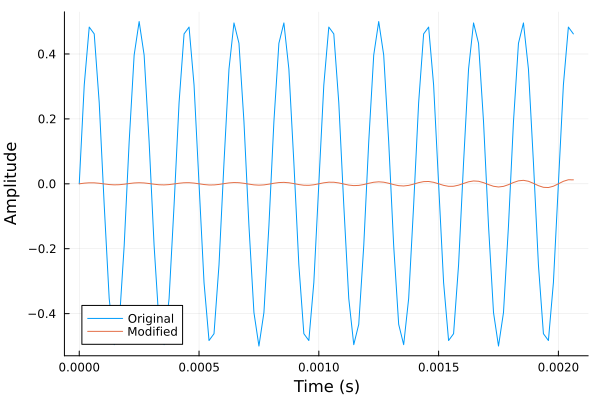

In [58]:
# Plot the original and modified signals
plot(t[1:100], x[1:100], label="Original")
plot!(t[1:100], x_mod[1:100], label="Modified")
xlabel!("Time (s)")
ylabel!("Amplitude")

In [79]:
using LinearAlgebra: norm
using Statistics: median
function check_ola_constraint(win, hop, n_samples)
    # win: window function
    # hop: hop size (in samples)
    # n_samples: number of samples in the input signal
    
    method = "ola";
    method = "wola";
    tol = 10e-12;

    if method == "wola"
        a = 1;
    elseif method == "ola"
        a = 0;
    end

    # Compute the sum of squared window function values for each time instant
    ola_sum = zeros(hop)
    n_frames = floor(length(win) ÷ hop);
    for i in 1:n_frames
        start_idx = (i - 1) * hop + 1
        end_idx = i * hop
        println(
            "size ola $(size(ola_sum)) -> size win $(size(win[start_idx:end_idx]))"
        )
        ola_sum += win[start_idx:end_idx] .^ (a + 1)
    end

    remainder = length(win) % hop
    if remainder != 0
        ola_sum[1:remainder] += win[end-remainder+1:end] .^ (a + 1)
    end
    
    println("ola_sum: $(norm(ola_sum,2))")
    # Verify that the sum is approximately equal to a constant
    nsumTotal = floor(length(win) ./ hop) + remainder;
    m = median(ola_sum);
    max_deviation = maximum(abs.(ola_sum .- m));

    if max_deviation > tol * nsumTotal
        println("OLA constraint violated!")
    else
        println("OLA constraint satisfied.")
    end
end

check_ola_constraint (generic function with 1 method)

In [80]:
win = hamming(1024)
hop = 256
n_samples = 8192
check_ola_constraint(win, hop, n_samples)

size ola (256,) -> size win (256,)
size ola (256,) -> size win (256,)
size ola (256,) -> size win (256,)
size ola (256,) -> size win (256,)
ola_sum: 25.40916250088385
OLA constraint violated!
